In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('cars.csv')

In [3]:
data.head()

,Acceleration,Cylinders,Displacement,Horsepower,Make,Model,Model Year,MPG,Origin,Weight
0,12.0,8,307,130.0,chevrolet,chevrolet chevelle malibu,70,18.0,USA,3504
1,11.5,8,350,165.0,buick,buick skylark 320,70,15.0,USA,3693
2,11.0,8,318,150.0,plymouth,plymouth satellite,70,18.0,USA,3436
3,12.0,8,304,150.0,amc,amc rebel sst,70,16.0,USA,3433
4,10.5,8,302,140.0,ford,ford torino,70,17.0,USA,3449


In [39]:
select_cols = data.drop(columns=["Acceleration", "Cylinders", "Displacement", "Horsepower", "Model", "Origin"])

In [40]:
select_cols.head()

,Make,Model Year,MPG,Weight
0,chevrolet,70,18.0,3504
1,buick,70,15.0,3693
2,plymouth,70,18.0,3436
3,amc,70,16.0,3433
4,ford,70,17.0,3449


In [41]:
eco_mask = select_cols["MPG"] > 15
vals = np.zeros([100,1])
vals[eco_mask] = 1
select_cols["eco-friendler"] = vals

In [42]:
select_cols.head()

,Make,Model Year,MPG,Weight,eco-friendler
0,chevrolet,70,18.0,3504,1.0
1,buick,70,15.0,3693,0.0
2,plymouth,70,18.0,3436,1.0
3,amc,70,16.0,3433,1.0
4,ford,70,17.0,3449,1.0


In [43]:
select_cols["Make"] = select_cols["Make"].astype("category")

In [44]:
select_cols.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Make           100 non-null    category
 1   Model Year     100 non-null    int64   
 2   MPG            94 non-null     float64 
 3   Weight         100 non-null    int64   
 4   eco-friendler  100 non-null    float64 
dtypes: category(1), float64(2), int64(2)
memory usage: 4.8 KB


In [47]:
mileage = select_cols["MPG"]
kilometers = mileage.map(lambda d: d*1.6)
select_cols["KM"] = kilometers

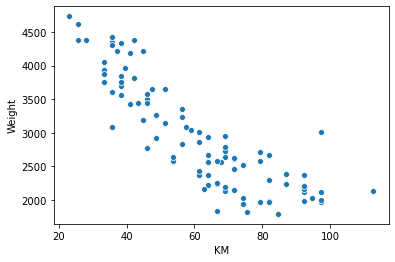

In [48]:
sns.scatterplot(select_cols["KM"], select_cols["Weight"])